**Data source:** https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2

import tensorflow as tf
from tensorflow.python.keras import Sequential

import os
import glob
import random
from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [ ]:
# Mount the dataset onto Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Navigate to My Drive directory to store the dataset
%cd /content/drive/My Drive/Colab Notebooks/MRI_DL/MRI_Dataset/Brain_MRI


/content/drive/My Drive/Colab Notebooks/MRI_DL/MRI_Dataset/Brain_MRI


In [ ]:
# data containing path to Brain MRI and their corresponding mask
df_brain_mri = pd.read_csv('data_mask.csv')

In [ ]:
df_brain_mri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [ ]:
df_brain_mri.sample(frac=0.005)

patient_id  \
1808  TCGA_DU_A5TY_19970709   
1801  TCGA_DU_A5TY_19970709   
867   TCGA_DU_6407_19860514   
128   TCGA_CS_4942_19970222   
3325  TCGA_HT_A616_19991226   
1937  TCGA_DU_A5TW_19980228   
246   TCGA_CS_6186_20000601   
1178  TCGA_DU_7013_19860523   
2131  TCGA_FG_6691_20020405   
709   TCGA_DU_6399_19830416   
3739  TCGA_DU_8167_19970402   
1849  TCGA_FG_5962_20000626   
2795  TCGA_HT_7690_19960312   
3082  TCGA_HT_8018_19970411   
2038  TCGA_FG_6692_20020606   
2784  TCGA_HT_7874_19950902   
2231  TCGA_FG_7634_20000128   
2791  TCGA_HT_7874_19950902   
3169  TCGA_HT_8111_19980330   
1176  TCGA_DU_7013_19860523   

                                             image_path  \
1808  TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_17...   
1801  TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_17...   
867   TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_8.tif   
128   TCGA_DU_5874_19950510/TCGA_DU_5874_19950510_2.tif   
3325  TCGA_DU_5874_19950510/TCGA_DU_5874_19950510_37...   
1937  TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_18...   
246   TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_3.tif   
1178  TCGA_HT_7860_19960513/TCGA_HT_7860_19960513_11...   
2131  TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_20...   
709   TCGA_DU_A5TY_19970709/TCGA_DU_A5TY_19970709_7.tif   
3739  TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_53...   
1849  TCGA_HT_8113_19930809/TCGA_HT_8113_19930809_17...   
2795  TCGA_DU_7013_19860523/TCGA_DU_7013_19860523_28...   
3082  TCGA_FG_7637_20000922/TCGA_FG_7637_20000922_32...   
2038  TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_19...   
2784  TCGA_DU_5852_19950709/TCGA_DU_5852_19950709_28...   
2231  TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_21...   
2791  TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_28...   
3169  TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_34...   
1176  TCGA_HT_7874_19950902/TCGA_HT_7874_19950902_11...   

                                              mask_path  mask  
1808  TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_17...     0  
1801  TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_17...     1  
867   TCGA_CS_6667_20011105/TCGA_CS_6667_20011105_8_...     0  
128   TCGA_DU_5874_19950510/TCGA_DU_5874_19950510_2_...     0  
3325  TCGA_DU_5874_19950510/TCGA_DU_5874_19950510_37...     0  
1937  TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_18...     0  
246   TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_3_...     0  
1178  TCGA_HT_7860_19960513/TCGA_HT_7860_19960513_11...     0  
2131  TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_20...     1  
709   TCGA_DU_A5TY_19970709/TCGA_DU_A5TY_19970709_7_...     0  
3739  TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_53...     0  
1849  TCGA_HT_8113_19930809/TCGA_HT_8113_19930809_17...     1  
2795  TCGA_DU_7013_19860523/TCGA_DU_7013_19860523_28...     1  
3082  TCGA_FG_7637_20000922/TCGA_FG_7637_20000922_32...     0  
2038  TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_19...     0  
2784  TCGA_DU_5852_19950709/TCGA_DU_5852_19950709_28...     0  
2231  TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_21...     1  
2791  TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_28...     1  
3169  TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_34...     0  
1176  TCGA_HT_7874_19950902/TCGA_HT_7874_19950902_11...     1

In [ ]:
df_brain_mri.mask_path[1854] # Path to the brain MRI image

'TCGA_HT_A616_19991226/TCGA_HT_A616_19991226_17_mask.tif'

In [ ]:
df_brain_mri.image_path[1854] # Path to the segmentation mask

'TCGA_HT_A616_19991226/TCGA_HT_A616_19991226_17.tif'

**Data Visualization**

In [ ]:
df_brain_mri

patient_id  \
0     TCGA_CS_5395_19981004   
1     TCGA_CS_5395_19981004   
2     TCGA_CS_5395_19981004   
3     TCGA_CS_5395_19981004   
4     TCGA_CS_5395_19981004   
...                     ...   
3924  TCGA_DU_6401_19831001   
3925  TCGA_DU_6401_19831001   
3926  TCGA_DU_6401_19831001   
3927  TCGA_DU_6401_19831001   
3928  TCGA_DU_6401_19831001   

                                             image_path  \
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
...                                                 ...   
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...   
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...   
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...   
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...   
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...   

                                              mask_path  mask  
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0  
...                                                 ...   ...  
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...     0  
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...     0  
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...     0  
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...     0  
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...     0  

[3929 rows x 4 columns]

In [ ]:
df_brain_mri['mask'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [ ]:
df_brain_mri.mask_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

In [ ]:
df_brain_mri.image_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

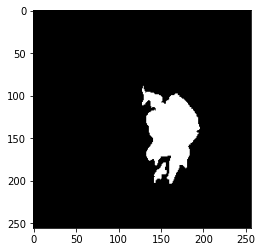

In [ ]:
plt.imshow(cv2.imread(df_brain_mri.mask_path[1917]))

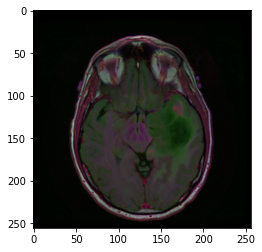

In [ ]:
plt.imshow(cv2.imread(df_brain_mri.image_path[1917]))

In [ ]:
cv2.imread(df_brain_mri.mask_path[1917]).max()

255

In [ ]:
cv2.imread(df_brain_mri.mask_path[1917]).min()

0

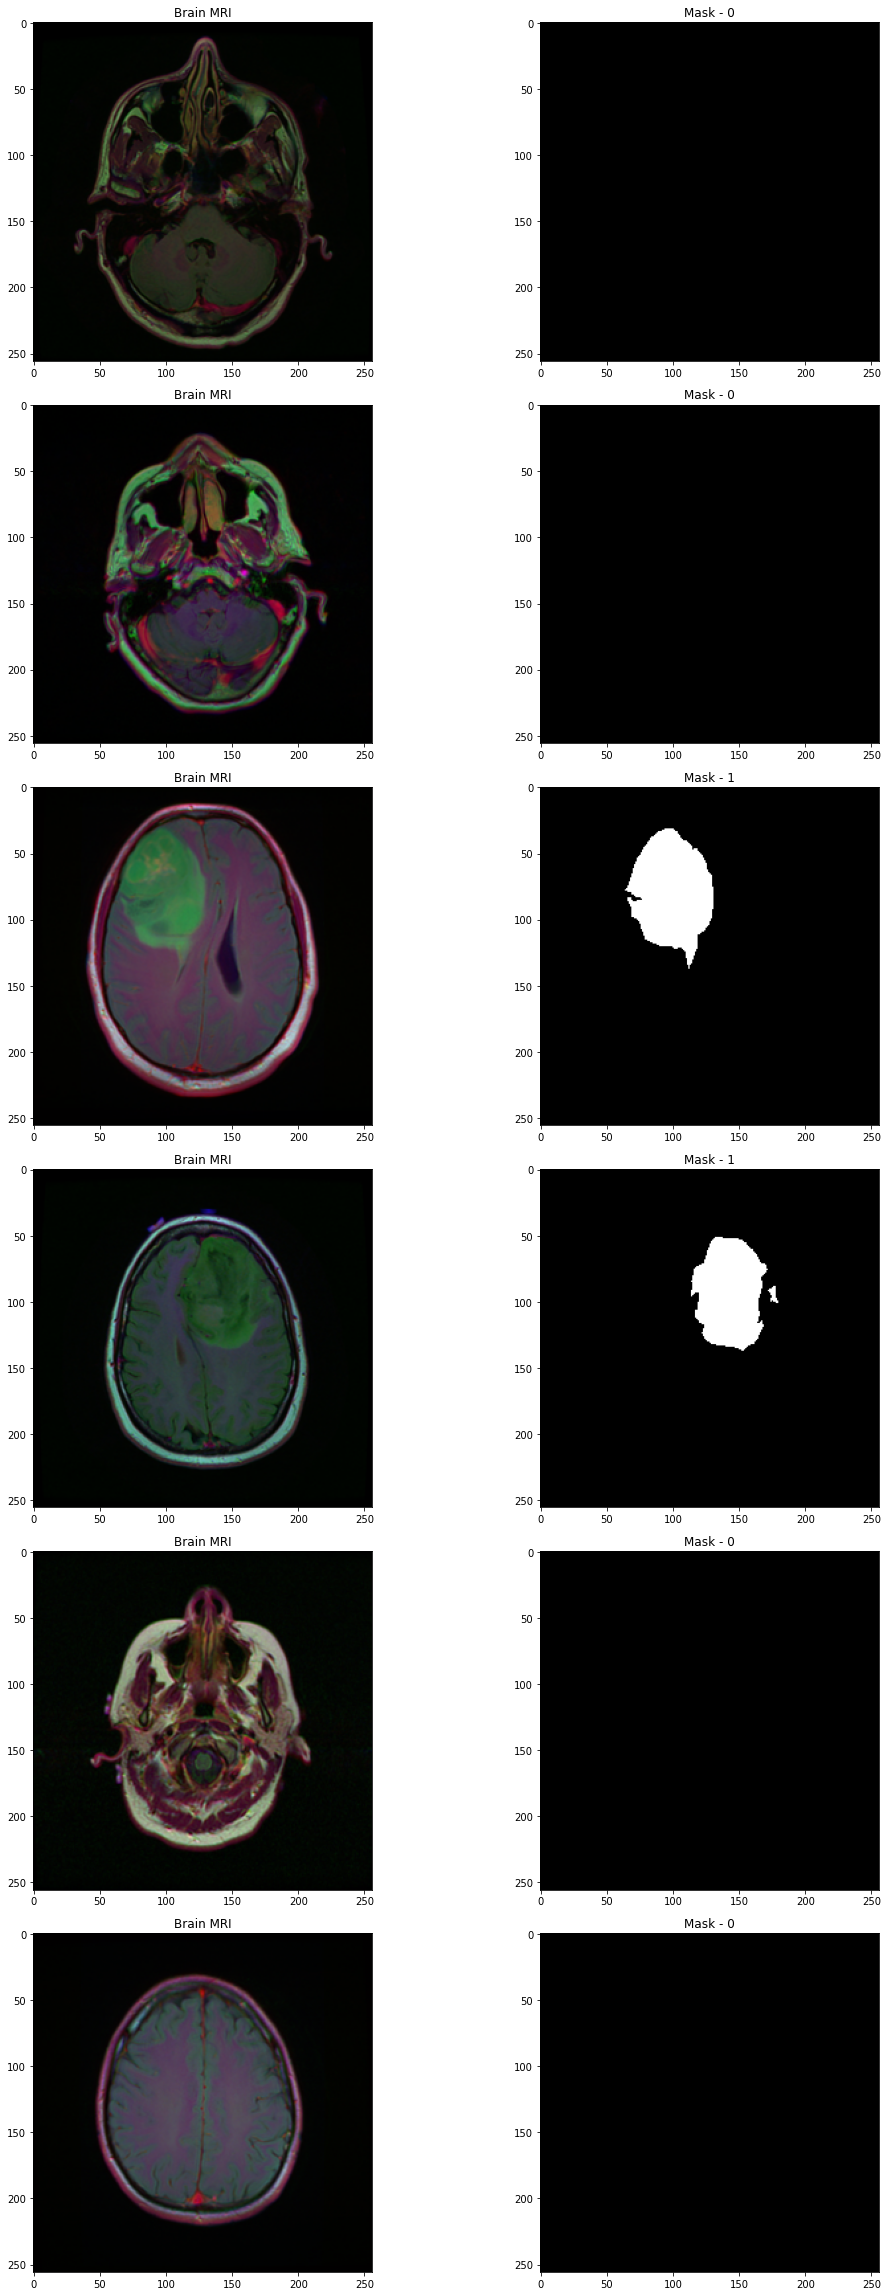

In [ ]:
# Basic visualizations: Visualize the images (MRI and Mask) in the dataset separately 
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(df_brain_mri)) # select a random index
  axs[count][0].title.set_text("Brain MRI") # set title
  axs[count][0].imshow(cv2.imread(df_brain_mri.image_path[i])) # show MRI 
  axs[count][1].title.set_text("Mask - " + str(df_brain_mri['mask'][i])) # plot title on the mask (0 or 1)
  axs[count][1].imshow(cv2.imread(df_brain_mri.mask_path[i])) # Show corresponding mask
  count += 1

fig.tight_layout()

#####**Visualize MRI image, Mask and Both together**

In [ ]:
from skimage import io

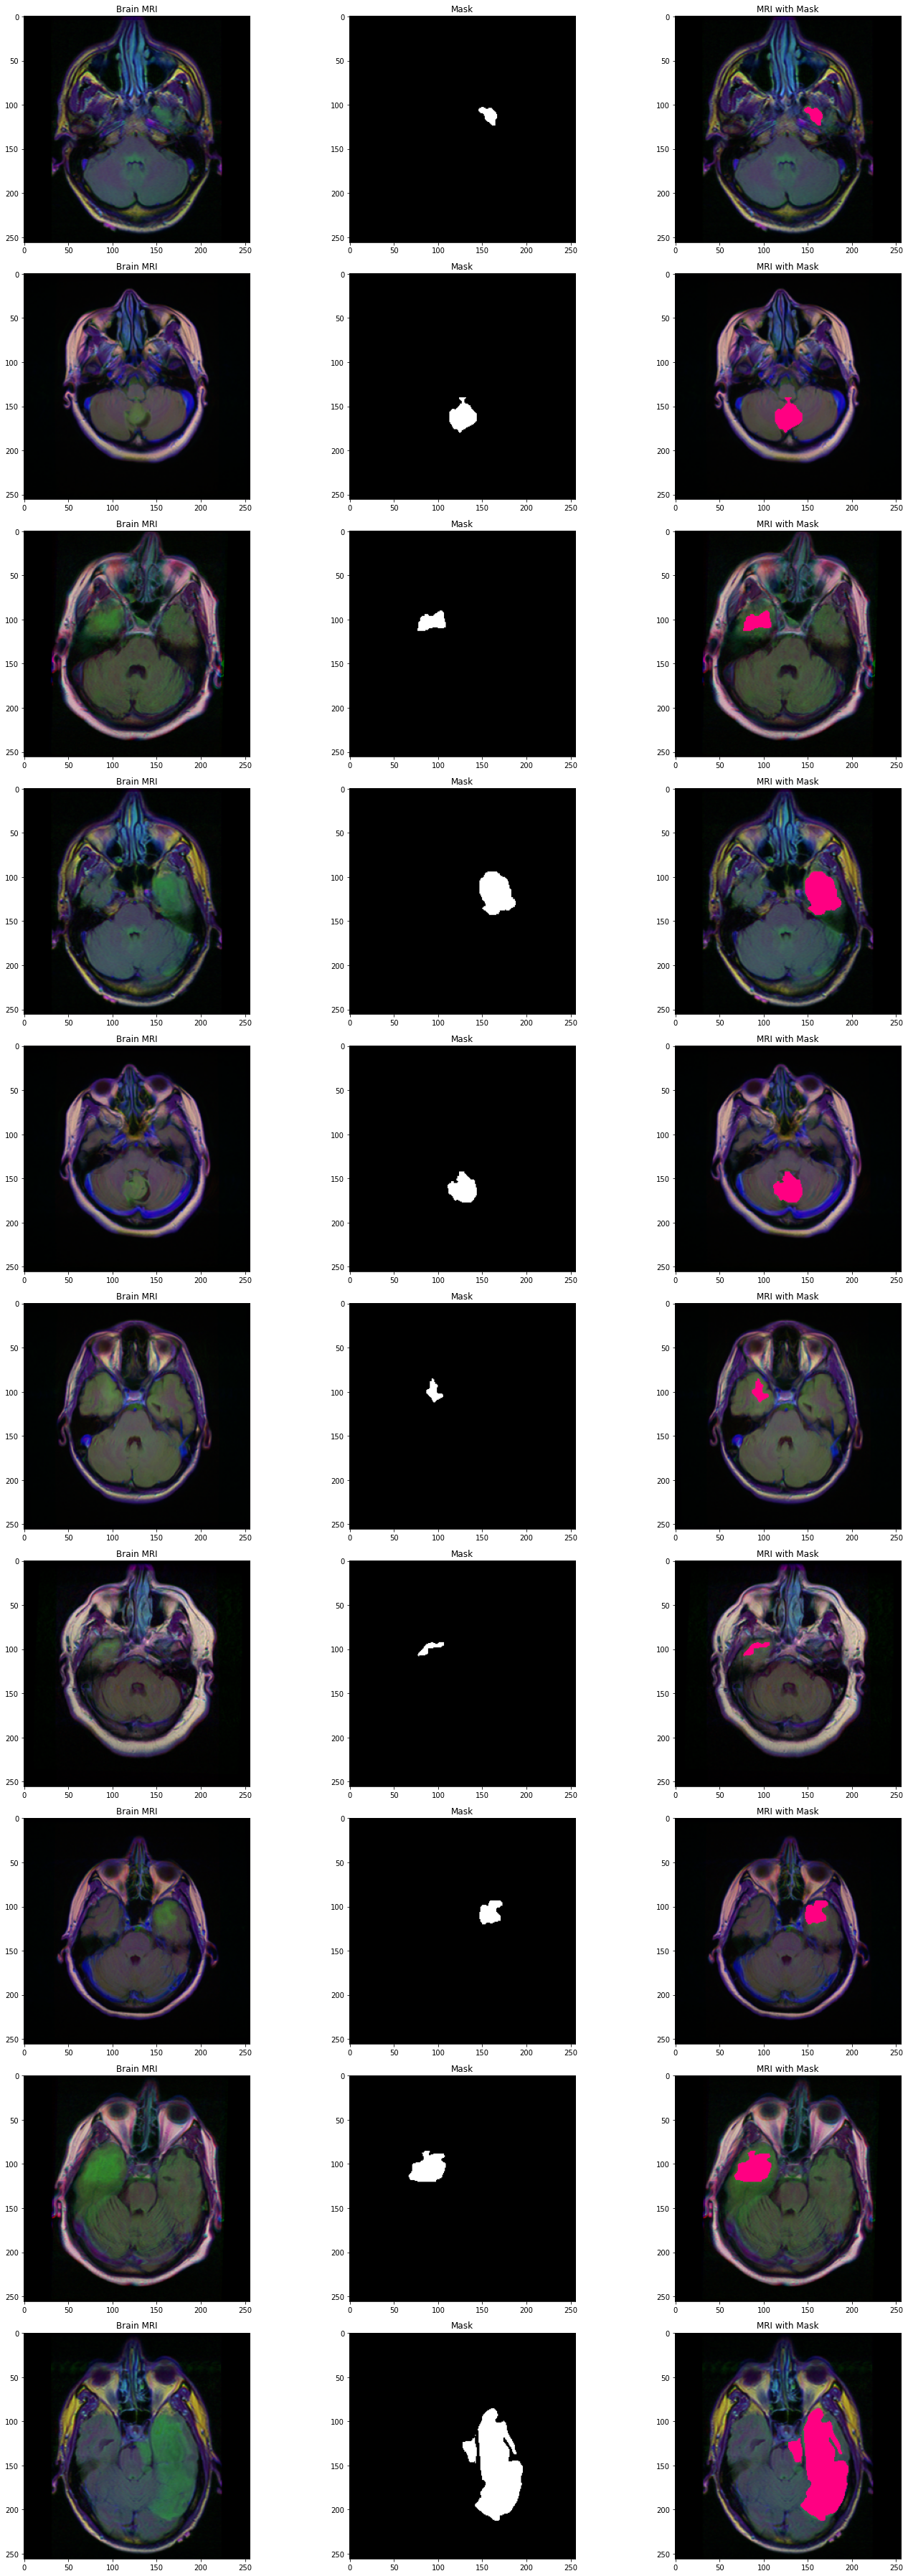

In [ ]:
count = 0
fig, axs = plt.subplots(10, 3, figsize = (20, 50))
for i in range(len(df_brain_mri)):
  if df_brain_mri['mask'][i] ==1 and count <10:
    img = io.imread(df_brain_mri.image_path[i])
    axs[count][0].title.set_text('Brain MRI')
    axs[count][0].imshow(img)

    mask = io.imread(df_brain_mri.mask_path[i])
    axs[count][1].title.set_text('Mask')
    axs[count][1].imshow(mask, cmap = 'gray')

    
    img[mask == 255] = (255, 0, 130)
    axs[count][2].title.set_text('MRI with Mask')
    axs[count][2].imshow(img)
    count+=1

fig.tight_layout()


#####**Train a classifier model to detect if tumor exists or not**

In [ ]:
# Drop the patient id column
df_brain_mri_train = df_brain_mri.drop(columns = ['patient_id'])
df_brain_mri_train.shape

(3929, 3)

In [ ]:
# Convert the data in mask column to string format, to use categorical mode in flow_from_dataframe

df_brain_mri_train['mask'] = df_brain_mri_train['mask'].apply(lambda x: str(x))

In [ ]:
df_brain_mri_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [ ]:
# split the data into train and test data

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_brain_mri_train, test_size = 0.15)

In [ ]:
# Import ImageDataGenerator library for image rescaling
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
# Keras ImageDataGenerator class provides a quick and easy way to augment images. 
# It provides a host of different augmentation techniques like standardization, 
# rotation, shifts, flips, brightness change, and many more. 

# Main benefit of using the Keras ImageDataGenerator class is that it is designed 
# to provide real-time data augmentation. It is generating augmented images on the fly 
# while the model is still in the training stage. 

# ImageDataGenerator class ensures that the model receives new variations of the images 
# at each epoch. But it only returns the transformed images and does not add it to 
# the original set of images. 

In [ ]:
# Create a data generator which scales the data from 0 to 1 and makes validation split of 0.15
# And in the same step it also creates validation set
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15)

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="training",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))


valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Create a data generator for test images
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))


Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [ ]:
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet import ResNet50, preprocess_input

In [ ]:
from keras.engine.input_layer import Input
# Get the ResNet50 base model
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256,256,3)))

In [ ]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
from keras import layers, optimizers

In [ ]:
# freeze the model weights

for layer in basemodel.layers:
  layers.trainable = False

In [ ]:
from keras.layers import *
from keras.models import Model, load_model

In [ ]:
# Add classification head to the base model

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)#
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
#headmodel = Dense(256, activation = "relu")(headmodel)
#headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# compile the model

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [ ]:
# save the best model with least validation loss
#checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint(filepath="mri_resnet_weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
# This is the main step of fitting the model. Whole training data is segregated with batch size of 16
# So the total number of batches = no_of_training_data/16. When all the batces complete, 1 epoch is done.
# Here we perform only 1 epoch. 1 epoch completes the whole training set once.
# During a batch it tests the validation set. To check if training error and validation error are both going down.
# Only after a batch the model parameters are updated. 
# If training error goes down but validation error goes up that means model is not going right.
# In that case early stopping is used.

history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

177/177 [==============================] - ETA: 0s - loss: 0.8580 - accuracy: 0.6890
Epoch 1: val_loss improved from inf to 2.69243, saving model to mri_resnet_weights.hdf5
177/177 [==============================] - 107s 534ms/step - loss: 0.8580 - accuracy: 0.6890 - val_loss: 2.6924 - val_accuracy: 0.6250


In [ ]:
# save the model architecture to json file for future use

model_json = model.to_json()
with open("mri_resnet_model.json","w") as json_file:
  json_file.write(model_json)

#####**Assess the performace of the Trained Model**

In [ ]:
# Load pretrained model (instead of training the model to save time) 
with open('resnet-50-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model  
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights.hdf5')
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [ ]:
# make prediction

test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1)

36/36 [==============================] - 7s 151ms/step


In [ ]:
test_predict.shape

(576, 2)

In [ ]:
test_predict

array([[1.3144013e-13, 1.0000000e+00],
       [1.0000000e+00, 3.1846947e-10],
       [1.0000000e+00, 1.6786298e-09],
       ...,
       [1.0000000e+00, 2.7475286e-08],
       [1.0000000e+00, 6.1976153e-09],
       [2.4344476e-05, 9.9997568e-01]], dtype=float32)

In [ ]:
# Obtain the predicted class from the model prediction
predict = []

for i in test_predict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)

In [ ]:
predict

array(['1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0',
       '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1',
       '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0

In [ ]:
# since we have used test generator, it is limited the images to len(predict), due to batch size

original = np.asarray(test['mask'])[:len(predict)]
len(original)

576

In [ ]:
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, predict)
accuracy

0.9826388888888888

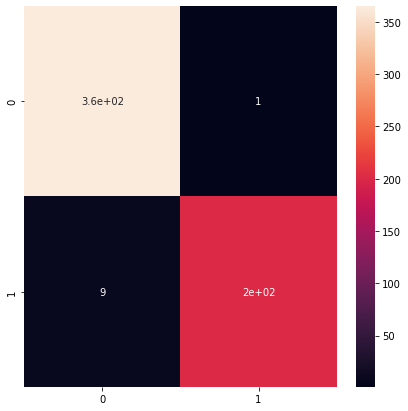

In [ ]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, predict)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(original, predict, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       366
           1       1.00      0.96      0.98       210

   micro avg       0.98      0.98      0.98       576
   macro avg       0.99      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576



/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


#####**To build segmentation model to localize the tumour**

In [ ]:
# Get the dataframe containing MRIs for which there is mask i.e. mask value = 1
df_brain_mri_mask = df_brain_mri[df_brain_mri['mask'] == 1]
df_brain_mri_mask.shape

(1373, 4)

In [ ]:
# split the data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(df_brain_mri_mask, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)

In [ ]:
# custom data generator
from utilities import DataGenerator

# create image generators

train_gen = DataGenerator(list(X_train.image_path),list(X_train.mask_path))
valid_gen = DataGenerator(list(X_val.image_path),list(X_val.mask_path))

In [ ]:
# Here we are defining a function for each step of ResUNet model
# The step defines 2 paths. Image data are copied into X_data1 and X_data2 for 2 paths.
# 1st path describes : Convolution - Batch normalization - ReLU - Convolution - Batch normalization
# 2nd path describes : Convolution - Batch normalization
# These two datasets are added to generate output of 1 res_step
# These steps are called multiple times during model building with ResUNet architecture

def res_step(X_data, filter):
  

  # make 2 sets of data for 2 paths
  X_data_1 = X_data
  X_data_2 = X_data

  # Path1
  X_data_1 = Conv2D(filter, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ='he_normal')(X_data_1)
  X_data_1 = BatchNormalization()(X_data_1)
  X_data_1 = Activation('relu')(X_data_1) 

  X_data_1 = Conv2D(filter, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer ='he_normal')(X_data_1)
  X_data_1 = BatchNormalization()(X_data_1)

  # Path2
  X_data_2 = Conv2D(filter, kernel_size = (1,1), strides =(1,1), kernel_initializer ='he_normal')(X_data_2)
  X_data_2 = BatchNormalization()(X_data_2)

  # Adding the output from Path1 and Path2 together

  X_data = Add()([X_data_1,X_data_2])
  X_data = Activation('relu')(X_data)

  return X_data

In [ ]:
# function to upscale and concatenate the values passsed
def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

In [ ]:
# UNet achitecture is based on Fully Convolutional Networks and it was
# mainly aimed for image segmentation for medical images.
# ResUNet Architecture combines UNet backbone architecture with residual
# blocks to overcome the vanishing gradient problems.
# Original U-Net Research Paper : https://arxiv.org/abs/1505.04597
# U-Net architecture : https://production-media.paperswithcode.com/methods/Screen_Shot_2020-07-07_at_9.08.00_PM_rpNArED.png
# ResUNet consists of :
#   1. Encoder or contraction path
#   2. Decoder or expansion path
# Build ResUNet 
input_shape = (256,256,3)

# Input tensor shape
X_input = Input(input_shape)

# Step 1
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Step 2
conv2_in = res_step(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Step 3
conv3_in = res_step(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Step 4
conv4_in = res_step(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Step 5 (Bottle Neck)
conv5_in = res_step(pool_4, 256)

# Upscale Step 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = res_step(up_1, 128)

# Upscale Step 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = res_step(up_2, 64)

# Upscale Step 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = res_step(up_3, 32)

# Upscale Step 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = res_step(up_4, 16)

# Final Output
output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output )

In [ ]:
model_seg.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                           

##### **Localize Tumour area - Training of Segmentation ResUNet Model**

In [ ]:
#A novel Focal Tversky loss function with improved Attention U-Net for lesion segmentation}, 
#author={Abraham, Nabila and Khan, Naimul Mefraz}, 
#journal={arXiv preprint arXiv:1810.07842}, year={2018} 

In [ ]:
from utilities import focal_tversky, tversky_loss, tversky

In [ ]:
# Compile the model
adam = tf.keras.optimizers.Adam(learning_rate = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="mri_resunet_weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model_seg.fit(train_gen, epochs = 1, validation_data = valid_gen, callbacks = [checkpointer, earlystopping])

72/72 [==============================] - ETA: 0s - loss: 0.2101 - accuracy: 0.9181
Epoch 1: val_loss improved from inf to 0.14569, saving model to mri_resunet_weights.hdf5
72/72 [==============================] - 52s 643ms/step - loss: 0.2101 - accuracy: 0.9181 - val_loss: 0.1457 - val_accuracy: 0.9670


In [ ]:
# save the model architecture to json file for future use

model_json = model_seg.to_json()
with open("mri_resunet_seg_model.json","w") as json_file:
  json_file.write(model_json)

##### **Performance of Trained Segmentation ResUNet Model**

In [ ]:
# Read from json file
with open('mri_resunet_seg_model.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture 
model_seg = tf.keras.models.model_from_json(json_savedModel)
model_seg.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Custom Prediction
from utilities import prediction

# making prediction
image_id, mask, has_mask = prediction(test, model, model_seg)

In [ ]:
# creating a dataframe for the result
df_seg_pred = pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'has_mask': has_mask})
df_seg_pred

image_path  \
0    TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_25...   
1    TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_38...   
2    TCGA_DU_8163_19961119/TCGA_DU_8163_19961119_36...   
3    TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_29...   
4    TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_32...   
..                                                 ...   
585  TCGA_HT_8563_19981209/TCGA_HT_8563_19981209_4.tif   
586  TCGA_DU_5852_19950709/TCGA_DU_5852_19950709_4.tif   
587  TCGA_DU_6401_19831001/TCGA_DU_6401_19831001_14...   
588  TCGA_HT_7608_19940304/TCGA_HT_7608_19940304_20...   
589  TCGA_FG_6692_20020606/TCGA_FG_6692_20020606_5.tif   

                                        predicted_mask  has_mask  
0    [[[[9.006605e-07], [4.234581e-06], [1.2665851e...         1  
1                                              No mask         0  
2                                              No mask         0  
3                                              No mask         0  
4    [[[[9.3821313e-07], [4.574081e-06], [1.2129145...         1  
..                                                 ...       ...  
585                                            No mask         0  
586                                            No mask         0  
587                                            No mask         0  
588  [[[[6.088077e-07], [1.9412587e-06], [3.0934864...         1  
589                                            No mask         0  

[590 rows x 3 columns]

In [ ]:
# Merge the dataframe containing predicted results with the original test data.
df_seg_pred = test.merge(df_seg_pred, on = 'image_path')
df_seg_pred.head()

image_path  \
0  TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_25...   
1  TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_38...   
2  TCGA_DU_8163_19961119/TCGA_DU_8163_19961119_36...   
3  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_29...   
4  TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_32...   

                                           mask_path mask  \
0  TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_25...    1   
1  TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_38...    0   
2  TCGA_DU_8163_19961119/TCGA_DU_8163_19961119_36...    0   
3  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_29...    0   
4  TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_32...    1   

                                      predicted_mask  has_mask  
0  [[[[9.006605e-07], [4.234581e-06], [1.2665851e...         1  
1                                            No mask         0  
2                                            No mask         0  
3                                            No mask         0  
4  [[[[9.3821313e-07], [4.574081e-06], [1.2129145...         1

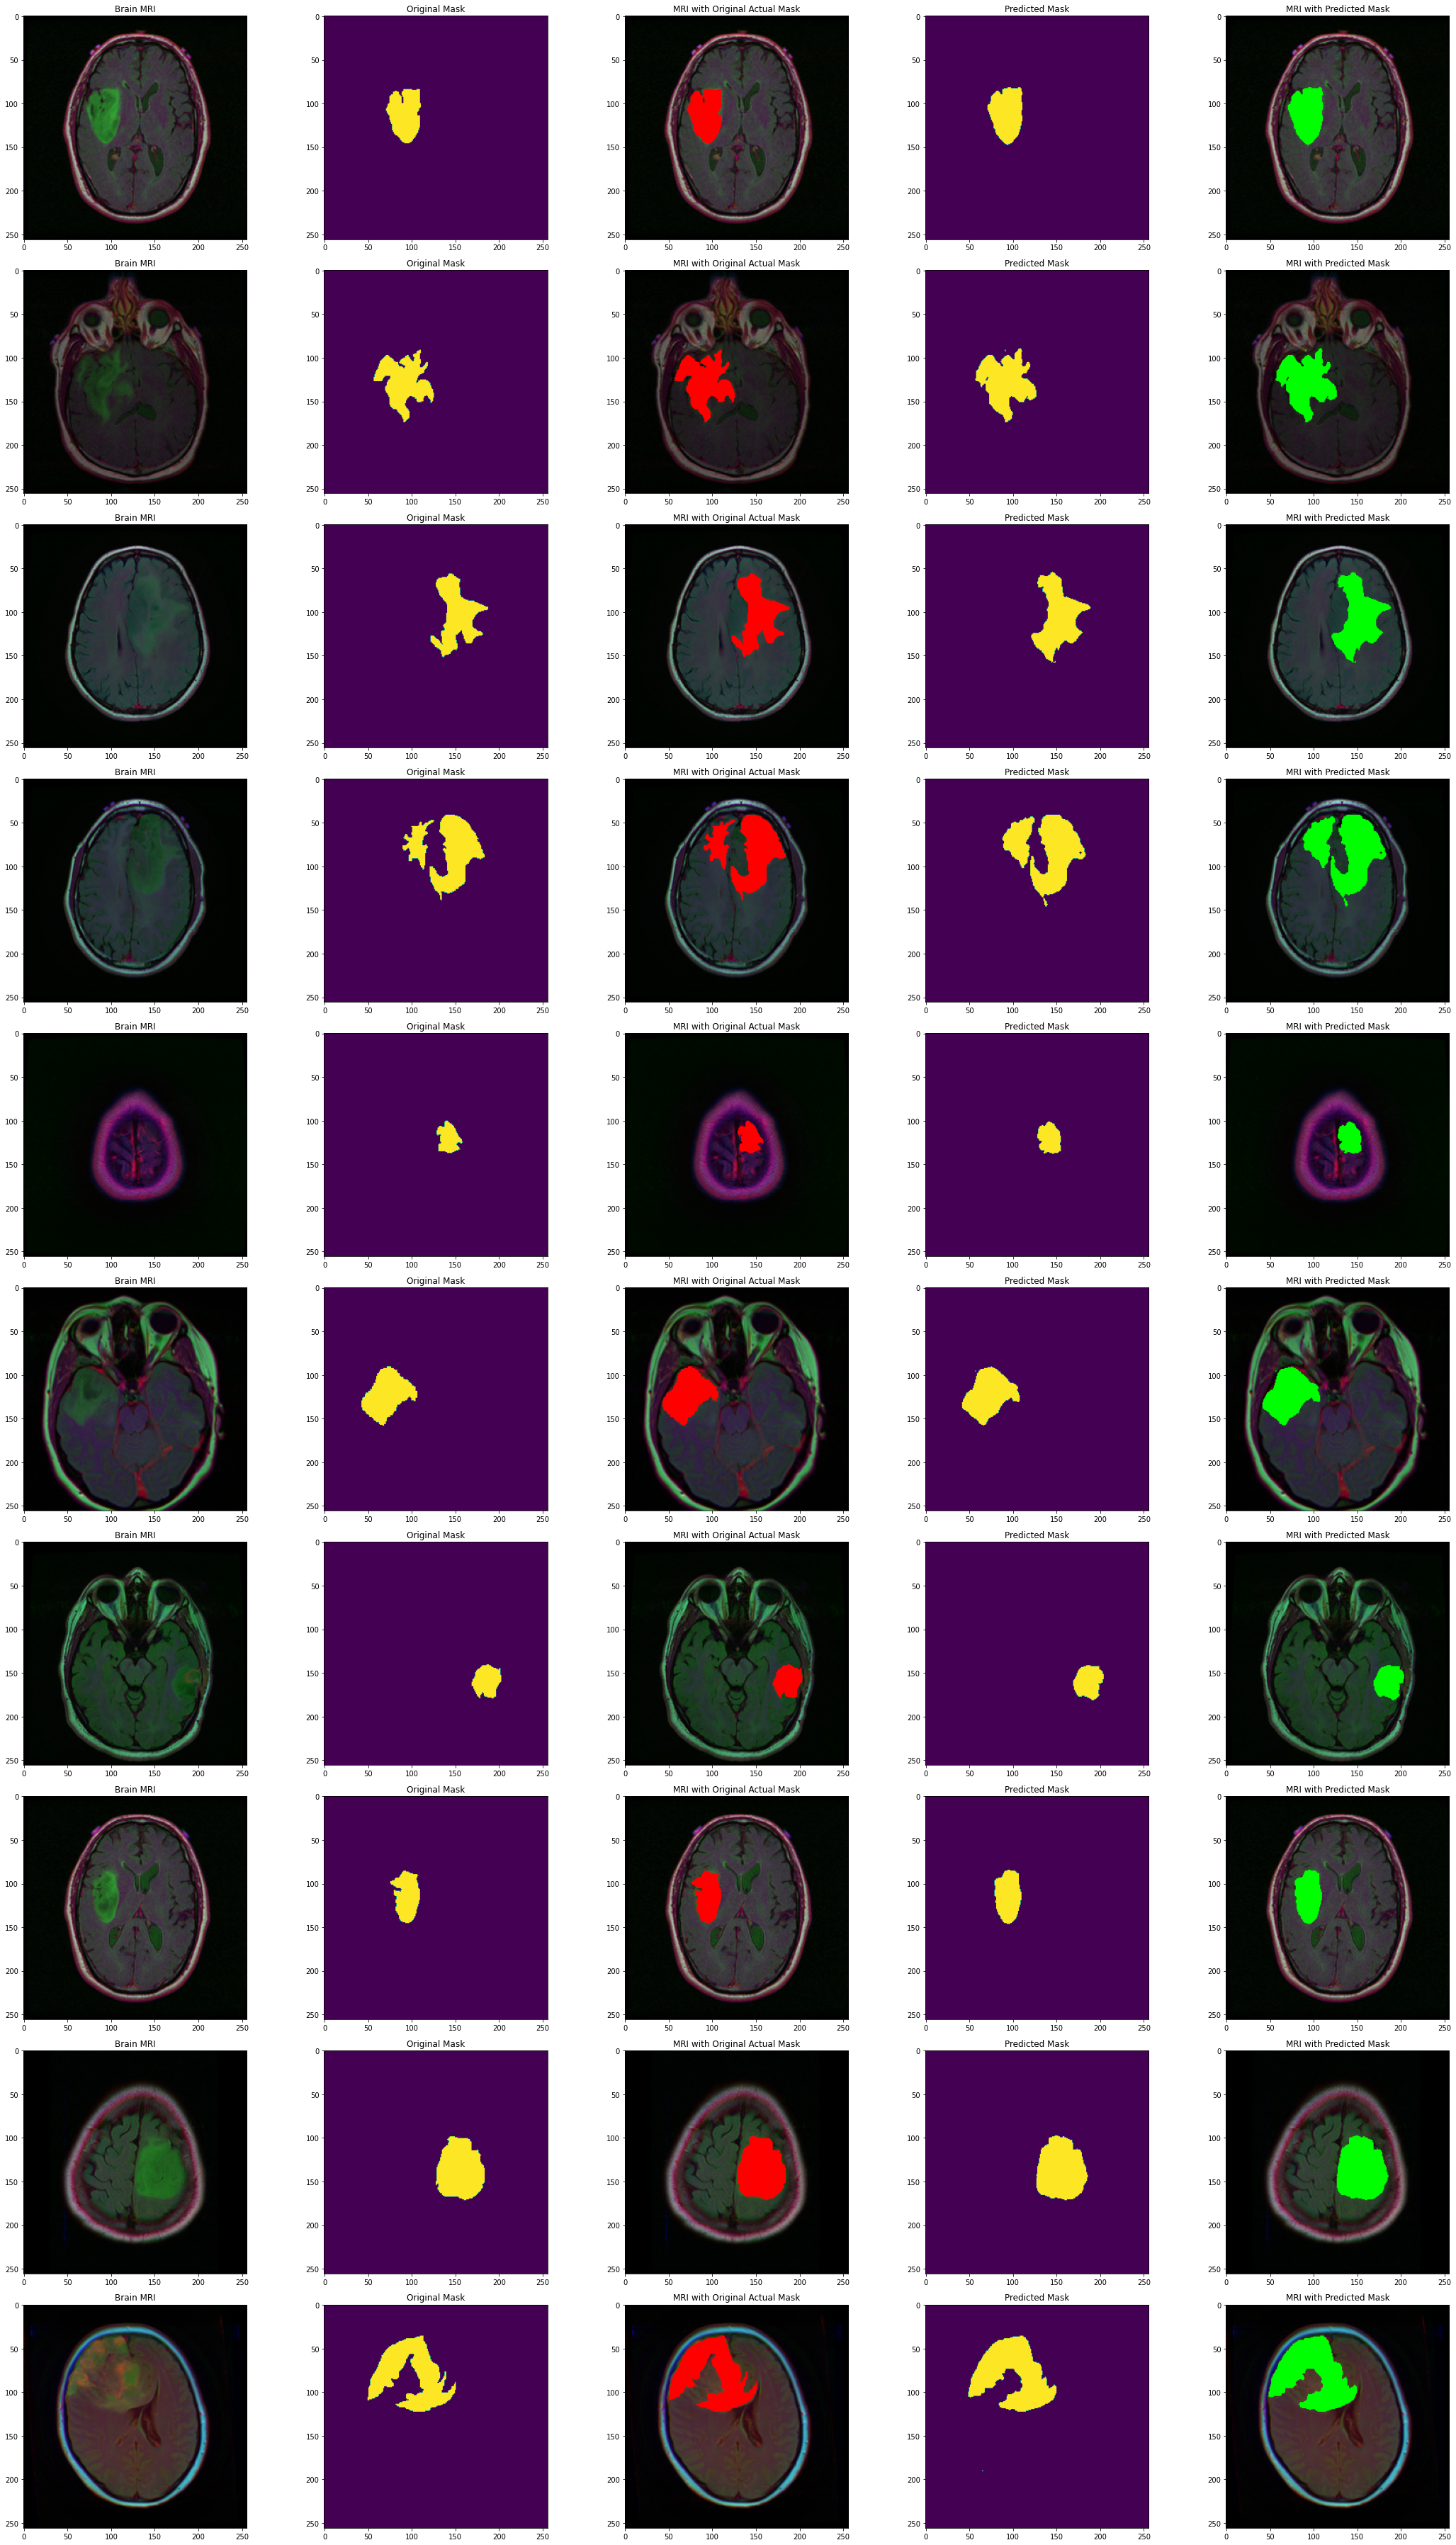

In [ ]:
count = 0 
fig, axs = plt.subplots(10, 5, figsize=(30, 50))
for i in range(len(df_seg_pred)):
  if df_seg_pred['has_mask'][i] == 1 and count < 10:
    # Convert images to RGB format
    img = io.imread(df_seg_pred.image_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)

    # Get the mask of the image 
    mask = io.imread(df_seg_pred.mask_path[i])
    axs[count][1].title.set_text("Original Mask")
    axs[count][1].imshow(mask)

    # Apply the mask to the image 'mask==255'
    img[mask == 255] = (255, 0, 0)
    axs[count][2].title.set_text("MRI with Original Actual Mask")
    axs[count][2].imshow(img)

    # Get the predicted mask of the image 
    predicted_mask = np.asarray(df_seg_pred.predicted_mask[i])[0].squeeze().round()
    axs[count][3].title.set_text("Predicted Mask")
    axs[count][3].imshow(predicted_mask)
    
    #Show the image with predicted mask
    img_ = io.imread(df_seg_pred.image_path[i])
    img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    img_[predicted_mask == 1] = (0, 255, 0)
    axs[count][4].title.set_text("MRI with Predicted Mask")
    axs[count][4].imshow(img_)
    count += 1

fig.tight_layout()